# **1. Importing Libraries and Loading Dataset**

In [1]:
# Downloading additional packages
!pip install neattext
!pip install pyspellchecker==0.5.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.6 MB/s eta 0:00:0000:0100:01


In [25]:
# Basic Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# For more plotting options
import seaborn as sns
plt.style.use('seaborn-darkgrid')
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
# wordclound
from PIL import Image # Python Imaging Library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# For machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import io # allows us to manage the file-related input and output operations
import re # regular expression
import time
import math
import string # create a string template for simpler string substitutions
import urllib #Python module for fetching URLs
import requests # The requests module allows you to send HTTP requests using Python
import neattext.functions as nfx # NLP package for cleaning text.
from neattext.pipeline import TextPipeline # Importing the pipeline structure


# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Fetching file from Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
/kaggle/input/fifa-world-cup-2022-tweets/fifa_world_cup_2022_tweets.csv


In [3]:
# Loading up the data into a DataFrame
tweet_data = pd.read_csv('/kaggle/input/fifa-world-cup-2022-tweets/fifa_world_cup_2022_tweets.csv', 
                         encoding="ISO-8859-1", 
                         parse_dates=['Date Created'])

# Shape of data.
print(f'Diamentions: {tweet_data.shape[0]} x {tweet_data.shape[1]}')

# Extracting hour from timestamp 
tweet_data['Hour'] = pd.to_datetime(tweet_data['Date Created']).dt.hour

# Top 5 row of dataframe
tweet_data.head()

Diamentions: 22524 x 6


,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Hour
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23


# **2. Driver Functions for Visualization**

In [4]:
################################## DRIVER FUNCTION - 1 ################################## 

def makeDonutChart(Height_val, Width_val, DataFrame, Categorical_data, row_amount, Title_text):
    """ Function which make a donut plot by taking chart diamentions, target dataframe and target column 
    along with the number of rows which you want to filter out/visualize on tree map as input"""

    # Creating a filttered dataframe
    madeup_df = DataFrame[Categorical_data].value_counts().reset_index().rename(columns={
      'index': Categorical_data, Categorical_data:'Count'}).sort_values(by='Count', ascending=False)

    # Chart Body
    fig = px.pie(madeup_df[:row_amount], values='Count', 
               names = Categorical_data, hole=.5, 
               height = Height_val, width = Width_val, 
               title = Title_text,
               color_discrete_sequence = px.colors.sequential.Agsunset)
    fig.update_layout(legend=dict(font = 
                                dict(size=12, color= "black"),
                                bgcolor="LightSteelBlue", 
                                bordercolor="Black", 
                                borderwidth = 2))
    # ploting figure as output
    return fig.show()

In [5]:
##################################  DRIVER FUNCTION - 2 #################################

def makeTreeMap(Height_val, Width_val, limit, DataFrame, Categorical_data, function, Title_Text):
    """ Function which make a Treemap plot of the given data """
    # creating a datafram
    madeup_df = DataFrame[Categorical_data].value_counts()[0:limit].reset_index().rename(
      columns={'index':Categorical_data, 
               Categorical_data:'count'})
    # Using plotly to plot a tree map
    fig = px.treemap(madeup_df[:limit], 
                   path=[px.Constant("Tree Map"), 
                         Categorical_data], 
                   color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'], 
                   values = function)
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), 
                    height = Height_val, 
                    width = Width_val, 
                    plot_bgcolor='#2d3035', 
                    paper_bgcolor='#2d3035',
                    title_font=dict(size=25, color='#a5a7ab', 
                                    family="Muli, sans-serif"),
                    font=dict(color='#8a8d93'), 
                    title= Title_Text)
    return fig.show()

In [6]:
################################## DRIVER FUNCTION - 3 ################################## 

def makeCrosstab(Height_val, Width_val, DataFrame, Numerical_data, Categorical_data):
    """ Function to make a simple cross-tabulation of two or more variables """
    # creating a body
    pd.crosstab(DataFrame[Numerical_data], DataFrame[Categorical_data]).plot.barh(stacked=True, 
                                                                     width = 1, 
                                                                     color = sns.color_palette("icefire", 9))
    # setting up the plot
    fig=plt.gcf()
    fig.set_size_inches(Height_val, Width_val)
    return plt.show() 

# **3. Driver Functions for EDA**

In [7]:
################################## DRIVER FUNCTION - 1 ################################## 

def textExtracter(dataframe, column, neattext_function):
    """ Function that extracts text element from a sentence with the help
    of neattext function and returns a dataframe with a count value """
    # Using neattext to extract desired text element
    extracts = dataframe[column].apply(neattext_function)

    # Looping through the tweet column to extract text elements
    extracted_elements =[]
    for i in range(len(extracts)):
        if extracts[i]:
            for j in range(len(extracts[i])):
                extracted_elements.append(extracts[i][j])
            else:
                continue

    # converting the list to dataframe
    extracted_df = pd.DataFrame(extracted_elements, columns=['extracts'])
    return extracted_df

# **4. Exploratory Data Analysis**

> # Sentiment Distribution

In [8]:
makeDonutChart(450, 700, tweet_data, 'Sentiment', None, 'Sentiment Distribution across the tweets made')

> # Tweeting Trend

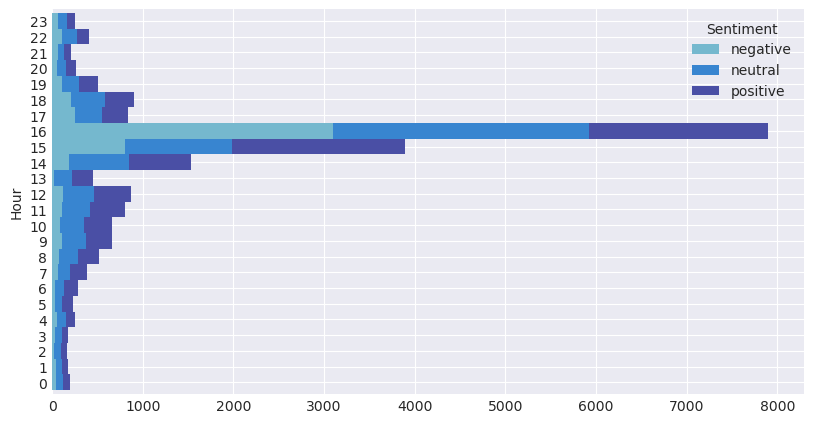

In [9]:
# sorting time(hour) w.r.t most number tweets has been made
hourly_trend = tweet_data[tweet_data['Hour'].isin(tweet_data['Hour'].value_counts().index)]

# Make crosstab plot
makeCrosstab(9.7, 5, hourly_trend, 'Hour', 'Sentiment')

> # Hashtags

In [10]:
# Assigning a variable for our hashtag dataframe
hashtags = textExtracter(tweet_data, 'Tweet', nfx.extract_hashtags)

# Ploting a treemap for Hashtag 
makeTreeMap(500, 800, 10, hashtags, 'extracts', 'count', 'Top 10 Trending hashtags')

> # UserHandles

In [11]:
# Assigning a variable for our UserHandles dataframe
userhandles = textExtracter(tweet_data, 'Tweet', nfx.extract_userhandles)

# Ploting a treemap for Hashtag 
makeTreeMap(500, 800, 10, userhandles, 'extracts', 'count', 'Top 10 Trending Userhandles')

> # Popular Source of Tweet

In [12]:
# Creating a dataframe which will contain type of sources and there count
tweet_source = tweet_data['Source of Tweet'].value_counts().reset_index().rename(
    columns={'index':'Source of Tweet','Source of Tweet':'Count'})

# Top 10 source of Tweets made
tweet_source[:11]

,Source of Tweet,Count
0,Twitter for iPhone,9507
1,Twitter for Android,6820
2,Twitter Web App,4505
3,TweetDeck,386
4,Twitter for iPad,240
5,Qualtrics Social Connect,165
6,Hootsuite Inc.,146
7,Buffer,71
8,Instagram,62
9,Tweetbot for iÎS,52


> # Most Liked Tweet

# **5. Text Cleaning**

Text cleaning is the process of preparing raw text for any kind of mechine learning model so that they/machines can understand human language. Gathering, sorting, and preparing data is the most important step in the data analysis process – bad data can have cumulative negative effects downstream if it is not corrected.

So, Lets start the process with removing the concatnated words (contractions), removing hashtags, Stopwords in different languages and other unwanted characters.

In [13]:
# It is important not to drop Negative words (Not, Nor, bad, etc.) and 
# Positive words (good, okay, yes, etc.) from the text 
# as they can play an important role in identifying the Text Sentiment.
# That`s why I`m using a custom stopword list.

custom_eng_stopwords = ['i', 'and', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 
                        'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 
                        'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 
                        'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 
                        'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
                        'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
                        'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 
                        'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same',
                        'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

def decontracted(phrase):
    """ Function to split generally used contractions """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

from tqdm import tqdm
preprocessed_tweets = []
# tqdm is for printing the status bar
# Looping through each tweet for cleaning text using RegExp
for sentance in tqdm(tweet_data['Tweet'].values):
    # Remove URLS
    sentance = re.sub(r'https?://\S+|www\.\S+', r'', sentance) 
    # Remove HTML
    sentance = re.sub(r'<.*?>', r'', sentance) 
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance) 
    # Remove mentions 
    sentance = re.sub(r'@[A-Za-z0-9_]+','', sentance)
    # Remove hashtags
    sentance = re.sub("#[A-Za-z0-9_]+","", sentance) 
    # Remove number
    sentance = re.sub(r'\d+', '', sentance).strip() 
    # Remove pnctuations
    sentance = re.sub(r"[^\w\s\d]","", sentance) 
    # Remove space
    sentance = re.sub(r"\s+"," ", sentance).strip() 
    # RegExp class which removes single digit characters and whitespace in between
    sentance = re.sub("\S*\d\S*", "", sentance).strip() 
    # specifies the matching of charaters in both Upper & lower case
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 

    # converting the words in the sentence in lower case 
    sentance = ' '.join([word.lower() for word in sentance.split() if not word.lower() in custom_eng_stopwords])
    preprocessed_tweets.append(sentance.strip())

100%|██████████| 22524/22524 [00:07<00:00, 2965.96it/s]


In [14]:
# Creating a column for cleaned tweets
tweet_data['Cleaned_tweets'] = preprocessed_tweets

# **6. Words Preprocessing**

In [22]:
final_tweets = tweet_data[['Cleaned_tweets', 'Sentiment']]

final_tweets.head(3)

,Cleaned_tweets,Sentiment
0,drinking today,neutral
1,amazing launch video shows much face canada me...,positive
2,worth reading watching,positive


> # Tokenization

   We use the Tokenization method to split a sentence into tokens or words.

In [23]:
# Calling the whitespace tokenizer
W_tokenizer = WhitespaceTokenizer()

# Now applying it on the target column
final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(W_tokenizer.tokenize)
display(final_tweets['Cleaned_tweets'].head(5))

0                                    [drinking, today]
1    [amazing, launch, video, shows, much, face, ca...
2                           [worth, reading, watching]
3                   [golden, maknae, shinning, bright]
4    [bbc, cares, much, human, rights, homosexual, ...
Name: Cleaned_tweets, dtype: object

> # Lemmatization and Stemming

   **Lemmatization** is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.
    
   **Snowball Stemmer**: It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer.

In [24]:
# Activating and creating a function Lemmatization implimentation
lemmatizer = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lemmatizer.lemmatize(word) for word in input]

final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(lemma_wordnet)

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [28]:
# Activating and creating a function snow-ball stemming implimentation
Sstemmer = SnowballStemmer('english')
def snowball_Stemmer(input):
    return [Sstemmer.stem(word) for word in input]

final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(snowball_Stemmer)

> # Short Words Removal

In [26]:
# remove words with less than 2 letters to reduce noice

useless_words = []
for sentence in final_tweets.Cleaned_tweets:
    for word in sentence:
        if len(word) <= 2 or None:
            useless_words.append(word)
            sentence.remove(word)

In [27]:
# its totally fine to discard these words as they don`t hold any meaning
# and can potentially affect model performence
useless_words[:10]

['jr', 'go', 'go', 'rt', 'w', 'vs', 'mo', 'pm', 'us', 'vs']

In [ ]:
# finally Combining individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined
final_tweets['Cleaned_tweets'] = final_tweets['Cleaned_tweets'].apply(combine_text)
display(final_tweets['Cleaned_tweets'].head(5))